# Введение в DS на УБ и МиРА (2022)

## Домашнее задание #4: Линейная регрессия

### Дедлайн: 10 июня 2022 года, 23:59

**Правила игры**

1. Домашнее задание состоит из трёх частей, которые оцениваются в 2 -- 4 -- 4 балла. Все пункты в пределах одной части имеют одинаковый вес.

2. Решения принимаются до **10 июня 2022 года, 23:59 МСК** включительно. Работы, отправленные после дедлайна, **не проверяются**. Дата и время сдачи определяются по последнему запушенному в репозиторий коммиту (можно увидеть на GitHub, наведя мышкой на указатель срока (например, 3 days ago) справа от файлов).

3. Все решения нужно загрузить в личный репозиторий на [GitHub Classroom](https://classroom.github.com/a/vX7_k1kZ).

4. Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. Разрешается использовать любые свободные источники с указанием ссылки на них.

5. Плагиат не допускается. При обнаружении случаев списывания, $0$ за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал. 

Для проверки гипотез используйте ваш любимый уровень значимости! 

---

В этом задании нам предстоит проанализировать набор данных [Weather in Szeged 2006-2016](https://www.kaggle.com/budincsevity/szeged-weather), содержащий информацию о погоде. В качестве зависимой переменной возьмём температуру воздуха в градусах Цельсия (`Temperature (C)`).

Наша цель состоит в том, чтобы построить две линейные регрессионные модели: объясняющую и предиктивную. Объясняющая модель должна быть пригодна для статистической интерпретации зависимостей, то есть показывать, какие факторы влияют на температуру воздуха, каким образом и какое возможное объяснение этого влияния можно привести. Предиктивная модель может быть совершенно ужасной с точки зрения статистики (например, все коэффициенты могут быть не значимы), но она должна давать хорошие прогнозы в соответствии с некоторой метрикой.

Хотя приведённые данные имеют формат временных рядов, мы будем игнорировать это и рассматривать их как обычные кросс-секционные данные (то есть как независимые наблюдения в пространстве).

### Часть 1: Предобработка данных (2 балла)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.** Загрузите данные из файла `weatherHistory.csv`. Выведите первые 5 строк таблицы.

In [3]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


**Задание 2.** Изучите статью о том, что такое [apparent temperature](https://www.kxan.com/weather/difference-between-temperature-and-feels-like-temperature/) (также называемая "feels-like temperature" и "heat index"). Удалите какую-то переменную из набора данных и поясните, почему вы её удалили (помните о том, какая переменная будет целевой). Также удалите переменные:
- `Formatted Date` (потому что договорились, что не обращаем внимания на даты).
- `Daily Summary` (будем использовать просто `Summary`). 

Прочитав статью, я поняла что apparent temperature это "ощущаемая температура". Она зависит от обычной температуры и влажности. Соответственно для предсказания зависимой переменной переменная apparent temperature не нужна.

In [4]:
df = df.drop(columns = ['Apparent Temperature (C)'], axis = 1)

In [5]:
df = df.drop(columns = ['Formatted Date',  'Daily Summary'], axis = 1)

In [6]:
df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36
96449,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16
96450,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66
96451,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95


**Задание 3.** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [7]:
df.isnull().sum()

Summary                     0
Precip Type               517
Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

Можно увидеть, что в Precip Type 517 пропущенных значений, удаляю эти строки

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Summary                   0
Precip Type               0
Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Loud Cover                0
Pressure (millibars)      0
dtype: int64

**Задание 4.** В данных есть одна числовая переменная, которая не несёт информации для предсказания целевой переменной. Найдите эту переменную, поясните ваш выбор и удалите её. 

In [10]:
df['Loud Cover'].unique()

array([0.])

В таблице есть столбец Loud Cover, при выводе уникальных значений можно заметить, что в данном признаке все данные равны 0.0, значит они никак не изменяются, я делаю вывод, что этот признак абcолютно никак не будет влиять на результаты анализа и ээту переменную можно удалить

In [11]:
df = df.drop(columns = ['Loud Cover'], axis = 1)

**Задание 5.** Постройте диаграммы рассеяния всех числовых переменных против целевой (для этого используйте какой-то метод из `seaborn`). Есть ли переменные, для которых наблюдается очевидная нелинейная зависимость?

**Подсказка:** это пригодится для частей 2 и 3.

<AxesSubplot:xlabel='Humidity', ylabel='Temperature (C)'>

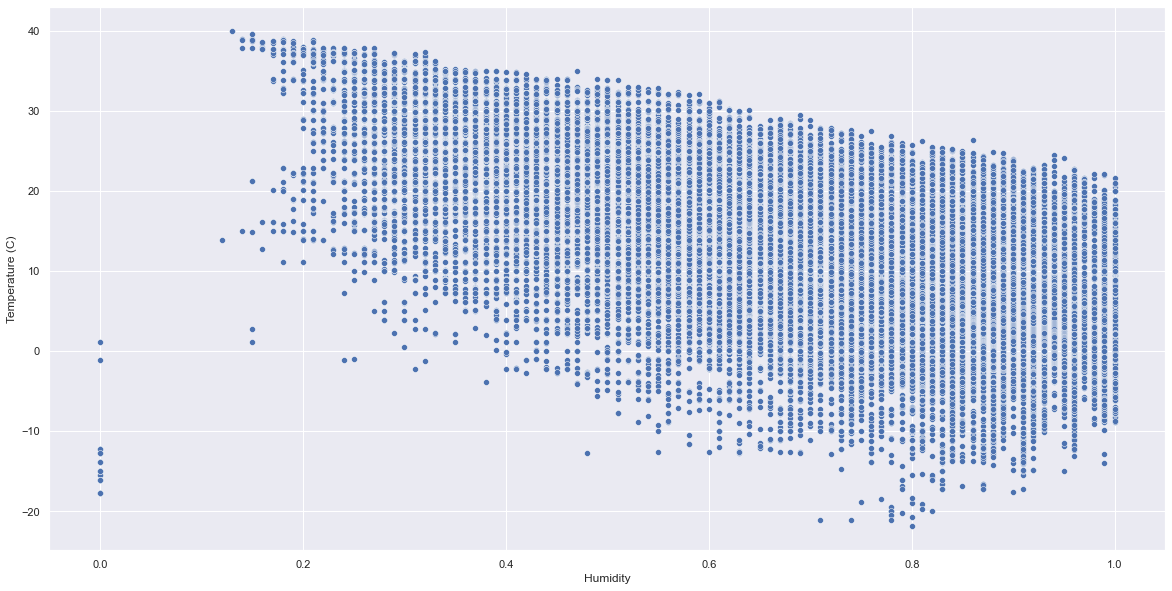

In [12]:
sns.set(rc = {'figure.figsize': (20, 10)})
sns.scatterplot(x = 'Humidity', y ='Temperature (C)', data = df)

<AxesSubplot:xlabel='Wind Speed (km/h)', ylabel='Temperature (C)'>

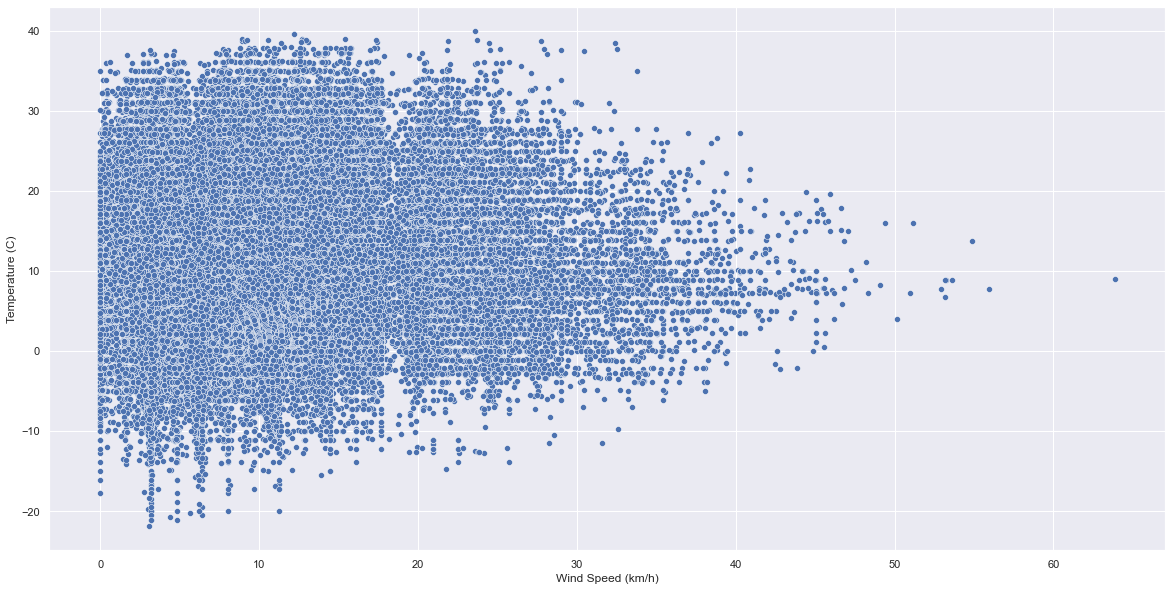

In [13]:
sns.scatterplot(x = 'Wind Speed (km/h)', y ='Temperature (C)', data = df)

<AxesSubplot:xlabel='Wind Bearing (degrees)', ylabel='Temperature (C)'>

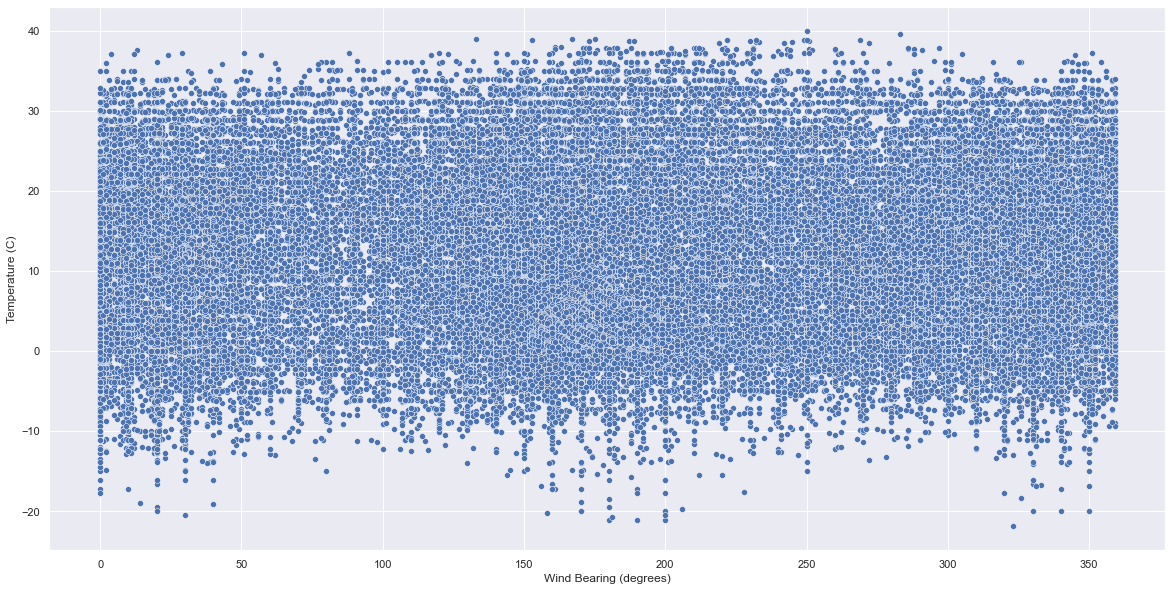

In [14]:
sns.scatterplot(x = 'Wind Bearing (degrees)', y ='Temperature (C)', data = df)

<AxesSubplot:xlabel='Visibility (km)', ylabel='Temperature (C)'>

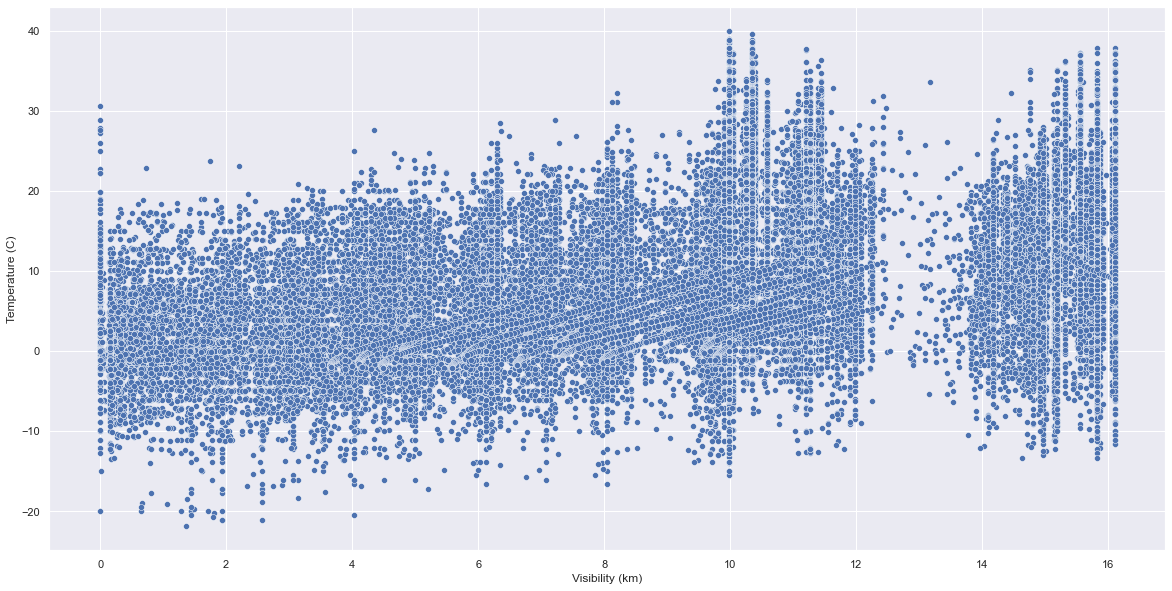

In [15]:
sns.scatterplot(x = 'Visibility (km)', y ='Temperature (C)', data = df)

<AxesSubplot:xlabel='Pressure (millibars)', ylabel='Temperature (C)'>

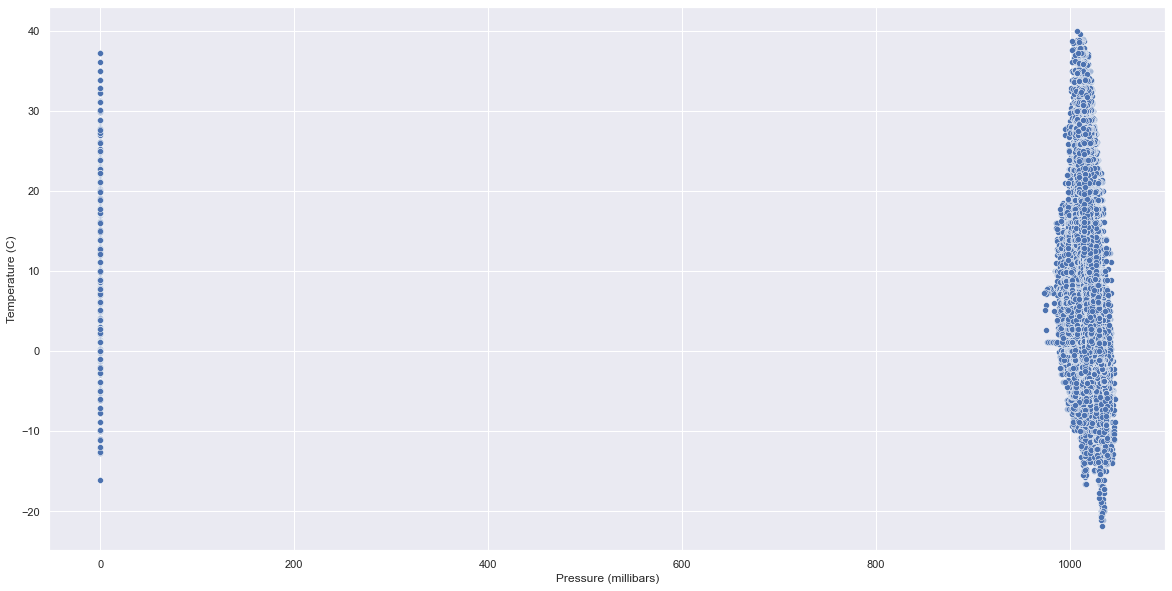

In [16]:
sns.scatterplot(x = 'Pressure (millibars)', y ='Temperature (C)', data = df)

Очень трудно делать какие-либо выводы по данным графикам, но могу предположить, что очевидная нелинейная зависимость наблюдается у переменной "Pressure (millibars)". У Visibility просматривается линейная зависимость, у wind bearing могу сказать только, что значения Температуры лежат в границах от -30 до +40 градусов, у Wind speed ничего четкого утверждать не могу. 

**Задание 6.** Преобразуйте категориальные переменные при помощи One Hot Encoding (то есть переведите их в дамми-переменные).

In [17]:
df['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

В столбце Precipe Type только два значения - rain и snow, значит можно создать одну дамми переменную, где rain будет кодироваться 0, а snow будет кодироваться 1

In [18]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [19]:
print(len(df['Summary'].unique()))

27


В столбце Summary очень много уникальных значений, чтобы закодировать категориальный признак с k уровнями как дамми переменную, надо создать k-1 фиктивных переменных, то есть 26 столбцов 

In [20]:
df['Type'] = df['Precip Type'].map({'rain':0, 'snow':1})
 
dummies = pd.get_dummies(df['Summary'], prefix='Summary').iloc[:, 1:]
df = pd.concat([df, dummies], axis=1)
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Type,Summary_Breezy and Dry,...,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,0,0,...,1,0,0,0,0,0,0,0,0,0


**Задание 7.** Выведите корреляционную матрицу переменных. Какие переменные лучше всего коррелируют с целевой (назовите три)? 

**Подсказка:** это пригодится для частей 2 и 3.

In [56]:
target_variable  = 'Temperature (C)'
regressors = ['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

In [57]:
df[[target_variable]+regressors].corr()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,-0.632148,0.008304,0.029937,0.393719,-0.005253
Humidity,-0.632148,1.000000,-0.224569,0.000814,-0.370511,0.005375
Wind Speed (km/h),0.008304,-0.224569,1.000000,0.104366,0.100801,-0.049453
Wind Bearing (degrees),0.029937,0.000814,0.104366,1.000000,0.048900,-0.011629
Visibility (km),0.393719,-0.370511,0.100801,0.048900,1.000000,0.061011
Pressure (millibars),-0.005253,0.005375,-0.049453,-0.011629,0.061011,1.000000


При выводе матрицы корреляций целевой переменной с числовыми признаками мы видим, что сильнее всего корреляция с целевой переменной у: 

1. Humidity, -0.632148	

2. Visibility (km) 0.393719	

3. Wind Bearing (degrees)

In [58]:
df.corr()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Type,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,...,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
Temperature (C),1.000000,-0.632148,0.008304,0.029937,0.393719,-0.005253,-0.563503,0.003093,-0.024854,-0.006512,...,0.046225,-0.211532,0.300242,-0.001968,-0.004901,0.005155,-0.000044,-0.000212,-0.009072,-0.005450
Humidity,-0.632148,1.000000,-0.224569,0.000814,-0.370511,0.005375,0.232622,-0.007833,0.019885,-0.036740,...,-0.031679,0.239445,-0.309874,0.011068,-0.007575,-0.008163,0.005449,-0.013161,-0.002897,-0.027829
Wind Speed (km/h),0.008304,-0.224569,1.000000,0.104366,0.100801,-0.049453,-0.067771,0.010732,0.062587,0.239942,...,0.055248,0.080466,-0.070561,-0.007387,0.041382,0.013736,0.031139,0.089196,0.101960,0.129135
Wind Bearing (degrees),0.029937,0.000814,0.104366,1.000000,0.048900,-0.011629,-0.042142,0.001578,-0.004784,0.027475,...,0.027994,-0.016621,0.016422,0.002309,0.011245,-0.001128,-0.001955,0.013149,0.011457,0.026489
Visibility (km),0.393719,-0.370511,0.100801,0.048900,1.000000,0.061011,-0.316483,-0.000294,-0.040006,0.019661,...,0.117192,-0.119702,0.244970,-0.020997,0.000766,-0.000294,-0.013086,0.003649,-0.002886,0.007105
Pressure (millibars),-0.005253,0.005375,-0.049453,-0.011629,0.061011,1.000000,0.009271,0.000508,0.000942,-0.001585,...,0.041744,0.009493,0.059333,0.001233,-0.068195,0.000469,0.000486,-0.003800,0.000609,-0.011239
Type,-0.563503,0.232622,-0.067771,-0.042142,-0.316483,0.009271,1.000000,-0.001145,0.040020,-0.014306,...,-0.089686,0.066266,-0.127585,-0.003620,-0.003238,-0.001145,0.002836,-0.006773,-0.003095,-0.009372
Summary_Breezy and Dry,0.003093,-0.007833,0.010732,0.001578,-0.000294,0.000508,-0.001145,1.000000,-0.000062,-0.000237,...,-0.002068,-0.001472,-0.002265,-0.000033,-0.000029,-0.000010,-0.000021,-0.000062,-0.000070,-0.000085
Summary_Breezy and Foggy,-0.024854,0.019885,0.062587,-0.004784,-0.040006,0.000942,0.040020,-0.000062,1.000000,-0.001405,...,-0.012238,-0.008712,-0.013400,-0.000195,-0.000174,-0.000062,-0.000123,-0.000365,-0.000414,-0.000505
Summary_Breezy and Mostly Cloudy,-0.006512,-0.036740,0.239942,0.027475,0.019661,-0.001585,-0.014306,-0.000237,-0.001405,1.000000,...,-0.047108,-0.033535,-0.051580,-0.000751,-0.000672,-0.000237,-0.000475,-0.001405,-0.001593,-0.001944


Если выводить матрицу корреляций целевой переменной со всеми признаками, тогда самыми скореллированными с Temperature будут:

1. Humidity, корреляция = -0.632148

2. Type (дамми переменная Precip Type), корреляция = -0.563503

3. Visibility (km), корреляция = 0.393719

**Задание 8.** Разделите данные на регрессоры (`X`) и целевую переменную (`y`). Если всё сделано правильно, то `X` и `y` должны иметь размеры, указанные ниже.

так как целевая переменная - Temperature (C), все остальные переменные - регрессоры

In [66]:
y = df['Temperature (C)']

In [67]:
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'Type', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy', 'Summary_Breezy and Mostly Cloudy',
       'Summary_Breezy and Overcast', 'Summary_Breezy and Partly Cloudy',
       'Summary_Clear', 'Summary_Dangerously Windy and Partly Cloudy',
       'Summary_Drizzle', 'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy'],
      dtype='object')

In [68]:
X = df[['Summary', 'Precip Type', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'Type', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy', 'Summary_Breezy and Mostly Cloudy',
       'Summary_Breezy and Overcast', 'Summary_Breezy and Partly Cloudy',
       'Summary_Clear', 'Summary_Dangerously Windy and Partly Cloudy',
       'Summary_Drizzle', 'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy']]

In [69]:
print('X:', X.shape)
print('y:', y.shape)

X: (95936, 34)
y: (95936,)


P.S. размеры переменных сошлись, ура ура)))

**Задание 8.** Похоже ли распределение целевой переменной на нормальное? Поясните, почему важно, чтобы распределение `y` было похоже на нормальное.

<AxesSubplot:xlabel='Temperature (C)', ylabel='Density'>

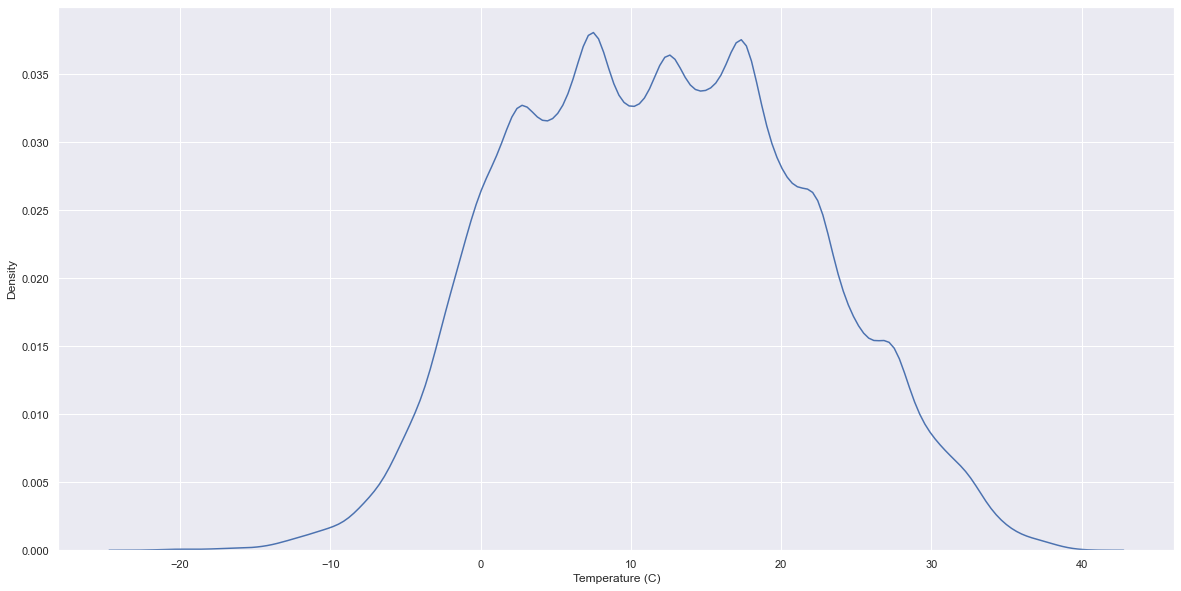

In [147]:
sns.kdeplot(Y)

<AxesSubplot:xlabel='Temperature (C)', ylabel='Count'>

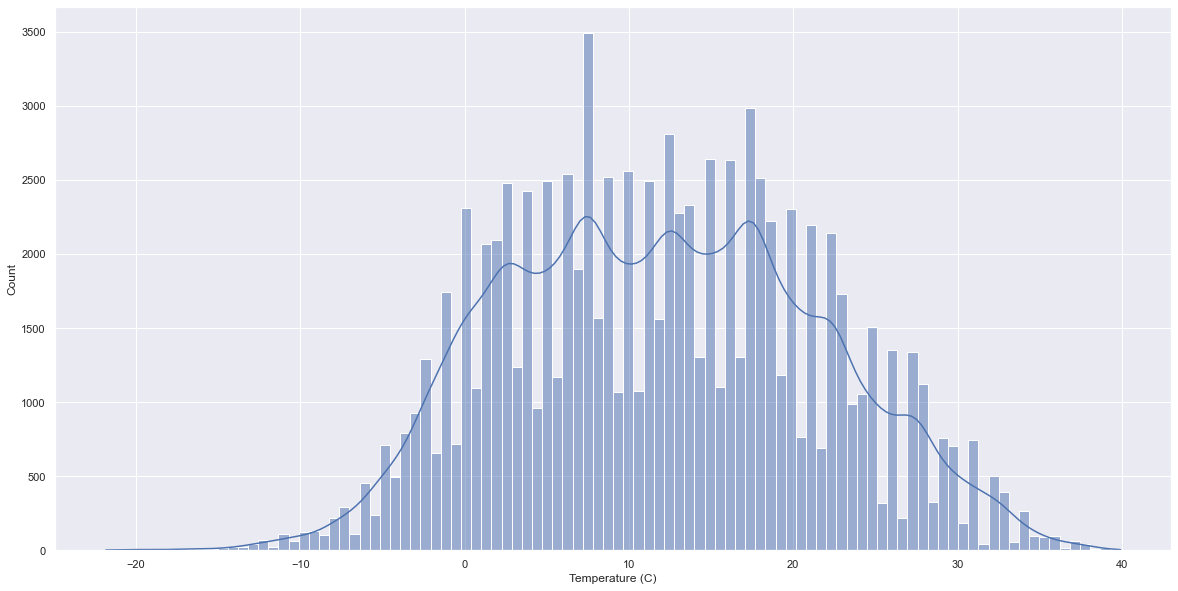

In [148]:
sns.histplot(data = Y, kde = True, bins = 100)

<AxesSubplot:>

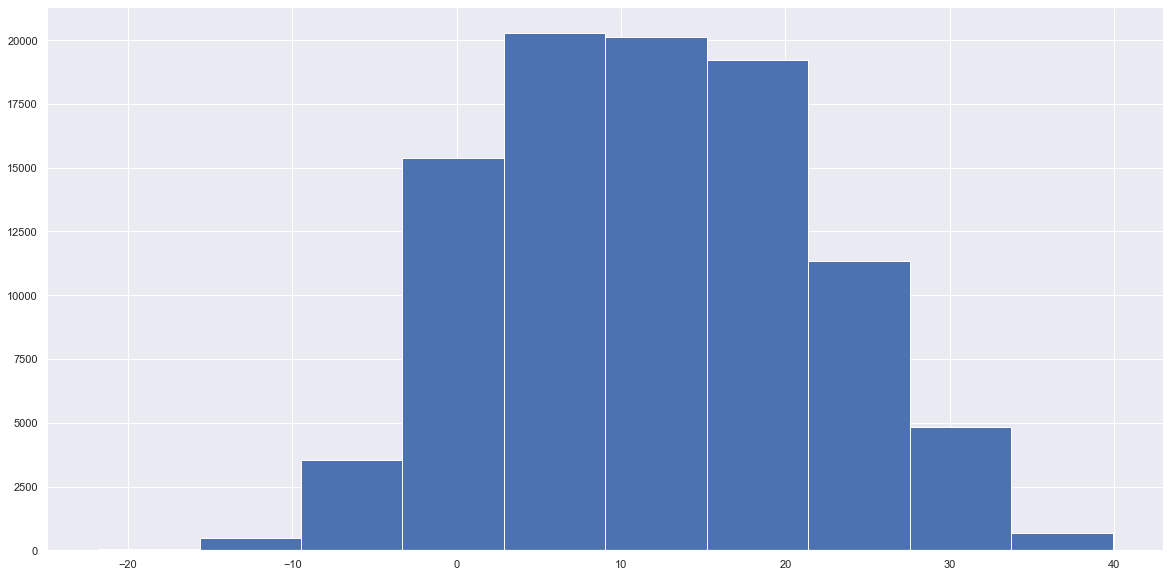

In [36]:
df['Temperature (C)'].hist()

Вообще, судя по графикам, распределение близко к нормальному. Важно, чтобы распределение было нормальным, так как это дает нам понимание, что модель линейной регрессии, которую мы строим, надежна.

### Часть 2: Построение объясняющей модели (4 балла)

**Задание 9.** На основании предыдущего анализа и логических соображений выберите шесть регрессоров (не считая константный), которые будут включены в объясняющую модель. Помните, что когда мы строим объясняющую модель, выбор переменных должнен быть обоснован (не достаточно использовать предыдущий анализ, выбор каждой переменной должен иметь теоретическое или логическое обоснование). В качестве регрессоров можно брать переменные из `X` или преобразования над ними (`Humidity` и `Humidity`$^2$ будем считать разными регрессорами). 

Создайте ячейку Markdown ниже и запишите в неё функциональный вид модели, которую вы будете оценивать. Поясните выбор регрессоров (не нужно углубляться в физику поведения жидкостей и ссылаться на уравнения Навье-Стокса, достаточно понятной научно-популярной интерпретации) и, если используете, выбор нелинейных преобразований над ними.

**Пример ответа:** я строю модель

$$
y_i = \beta_0 + \beta_1 Humidity + \beta_2 Humidity^2 + \beta_3 Humidity^3 + \beta_4 Visibility (km) + \beta_5 Visibility (km) ^ 2 + \beta_6 Summary\_Breezy + \varepsilon_i
$$

Обоснование выбора переменных:
- $Humidity$ – потому что мне кажется, что влажность воздуха влияет на температуру <так-то и так-то>.
- $Humidity^2$ – потому что ...
- ...

Я строю модель

$$
y_i = \beta_0 + \beta_1 Humidity + \beta_2 Type + \beta_3 Visibility + \beta_4 Summary\_Foggy + \beta_5 Summary\_Partly\ Cloudy + \beta_6 Summary\_Overcast + \varepsilon_i
$$

Основание выбора переменных:

* $Humidity$ - потому что мне кажется, что по графику можно сказать, что у данного признака с целевой переменной линейная зависимость, кроме того, значение корреляции между этими двумя признаками высоко. 
* $Type$ - потому что относительно высокая корреляция с целевой переменной, Snow (1) - снег идет при температуре ниже нуля, Rain(0) - дождь идет при температуре выше нуля
* $Visibility$ - потому что по графику видна линейная зависимость, кроме того корреляция между этими признаками относительно высока  
* $Summary\_Foggy$ - потому что относительно высокая корреляция. Мои знания естественных наук подсказывают, что туманная погода мешает солнечным лучам достигать земли и соответственно нагревать ее, значит это как то может влиять на температуру
* $Summary\_Partly\ Cloudy$ - потому что относительно высокая корреляция
* $Summary\_Overcast$ - потому что относительно высокая корреляция, аналогично, пасмурная погода - меньше солнца - температура ниже 


P.S. корреляции с целевой переменной такие:

Humidity	-0,632148

Type	-0,563503

Visibility (km)	0,393719

Summary_Foggy	-0,310437

Summary_Partly Cloudy	0,300242

Summary_Overcast	-0,211532


**Задание 10.** Выделите выбранные признаки в переменную `X1`. 

In [53]:
X1 = df[['Humidity', 'Type', 'Visibility (km)', 'Summary_Foggy', 'Summary_Partly Cloudy', 'Summary_Overcast']]

**Задание 11.** Оцените модель при помощи МНК (минимзации MSE). Прокомментируйте значимость коэффициентов.

In [84]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Temperature (C) ~ Humidity + Type + Visibility (km) + Summary_Foggy + Summary_Partly Cloudy + Summary_Overcast', data=df).fit()

SyntaxError: invalid syntax (<unknown>, line 1)

Видимо в названиях переменных питону не нравятся пробелы, создам отдельный датафрейм и туда добавлю переименнованные нужыне колонки


In [85]:
df_new = pd.DataFrame()
df_new['Temperature'] = df['Temperature (C)']
df_new['Humidity'] = df['Humidity']
df_new['Type'] = df['Type']
df_new['Visibility'] = df['Visibility (km)']
df_new['Foggy'] = df['Summary_Foggy']
df_new['PartlyCloudy'] = df['Summary_Partly Cloudy'] 
df_new['Overcast'] = df['Summary_Overcast']

In [86]:
df_new

,Temperature,Humidity,Type,Visibility,Foggy,PartlyCloudy,Overcast
0,9.472222,0.89,0,15.8263,0,1,0
1,9.355556,0.86,0,15.8263,0,1,0
2,9.377778,0.89,0,14.9569,0,0,0
3,8.288889,0.83,0,15.8263,0,1,0
4,8.755556,0.83,0,15.8263,0,0,0
...,...,...,...,...,...,...,...
96448,26.016667,0.43,0,16.1000,0,1,0
96449,24.583333,0.48,0,15.5526,0,1,0
96450,22.038889,0.56,0,16.1000,0,1,0
96451,21.522222,0.60,0,16.1000,0,1,0


In [87]:
lm = smf.ols(formula='Temperature ~ Humidity + Type + Visibility + Foggy + PartlyCloudy + Overcast', data=df_new).fit()

In [88]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                 2.342e+04
Date:                Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:46:18   Log-Likelihood:            -3.0955e+05
No. Observations:               95936   AIC:                         6.191e+05
Df Residuals:                   95929   BIC:                         6.192e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       28.8769      0.121    239.322      0.000      28.640      29.113
Humidity       -23.5195      0.115   -204.522      0.000     -23.745     -23.294
Type           -12.7983      0.067   -191.503      0.000     -12.929     -12.667
Visibility       0.1413      0.006     22.584      0.000       0.129       0.154
Foggy            0.0763      0.100      0.764      0.445      -0.119       0.272
PartlyCloudy     1.4363      0.047     30.875      0.000       1.345       1.528
Overcast        -0.9695      0.059    -16.551      0.000      -1.084      -0.855
==============================================================================
Omnibus:                     1704.629   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1463.494
Skew:                          -0.243   Prob(JB):                         0.00
Kurtosis:                       2.639   Cond. No.                         90.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Уровень значимости 5%.

P>|t| показывает значимость коэффициентов, можно заметить, что на уровне значимости 5% наличие тумана не влияет на температуру, так p-value больше alpha, все остальные коэффициенты при регрессорах значимыми являются, значение каждого p-value меньше уровня значимости 

**Задание 12.** Поясните, как каждый регрессор влияет на зависимую переменную 
1. математически ("при увеличении $X$ на 1 $Y$ увеличивается на 3") и 
2. содержательно ("$X$ влияет на $Y$ положительно, потому что...", "$X$ не оказывает влияния на $Y$, потому что...").

In [74]:
features = list(X1.columns)
for co, fe in zip(model.coef_, features):
    print(fe, round(co, 2))

Humidity -23.52
Type -12.8
Visibility (km) 0.14
Summary_Foggy 0.08
Summary_Partly Cloudy 1.44
Summary_Overcast -0.97


Поясню, как каждый регрессор влияет на зависимую переменную:

* при увеличении влажности на единицу температура уменьшается на 23,52, влажность влияет на температуру отрицательно, потому что при увеличении влажности температура уменьшается

* при изменении типа осадков с "дождя" на "снег" температура уменьшается на 12,8, тип осадков "снег" влияет на температуру отрицательно, потому что тип осадков = снег, температура понижаетя, становится холодно

* при увеличении видимости на 1 единицу (км) температура увеличивается на 0,14, видимость влияет на температуру положительно, потому что при увеличении видимости увеличивается температура.

при создании фиктивной переменной всеми нулями закодировалась погода "Breezy"

* при изменении погоды со "слабого ветерка" (breezy) на туманную погоду температура увеличивается на 0,08. Изменение погоды на туманную влияет на температуру положительно, потому что при туманной погоде температура увеличивается (получается, если дует ветерок - земля охлаждается и температура ниже, чем когда ветерка нет, туман создает видимо парниковый эффект и становится потеплее... тепло с земли не уходит... ну видимо как то так...). Стоит заметить, что изменение ооооочень оченнь очень маленькое, выше было показано, что коэффициент при данном регрессоре не значим, просто дальше в заданиях не было сказано убрать незначеимые регрессоры, вот я и не убирала

* при изменении погоды со "слабого ветерка" на переменную облачность температура увеличивается на 1.44, изменении погоды на переменную облачность положительное, потому что при таком изменении погоды температура увеличивается 

* при изменении погоды на пасмурную температура уменьшается на 0,97, такое изменение погоды влияет на температуру отрицательно, потому что температура уменьшается

**Задание 13.** Рассчитайте $R^2$ и MSE на выборке `X1`. Прокомментируйте качество подгонки регрессии.

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X1, y)
y_pred = model.predict(X1)
print(r2_score(y, y_pred))

0.5942577870277534


$R^2$ = 0.5942577870277534, данное значение как мининмум больше 0,5, поэтому данную регрессионную модель можно считать качественной, но вообще $R^2$ более полезен при сравнении двух моделей между собой, для одной модели нельзя на 100% что либо утвержать 

Для того, чтобы оценить показатель MSE, нам необходимо его сравнивать, сравнивать можно с наивным прогнозом

In [91]:
y_mean = np.mean(y)
y_pred_naive = np.ones(len(y)) * y_mean
y_pred_naive[:5]

array([11.9409757, 11.9409757, 11.9409757, 11.9409757, 11.9409757])

In [92]:
from sklearn.metrics import mean_squared_error
def mse(y_test, y_pred):
    return mean_squared_error(y_test, y_pred)
mse(y, y_pred_naive)

91.59678175559762

это mse для наивного прогноза

In [93]:
mse(y, y_pred)

37.16468093065209

а это mse для моей модели, можно сказать, что моя модель лучше чем наивный прогноз, тк mse наивного больше чем mse моей модели 

### Часть 3: Построение предсказательной модели (4 балла)

В предыдущей части мы хотели объяснить $y$ при помощи каких-то регрессоров, которые мы отбирали из теоретико-логических соображений. Теперь поставим другую задачу: мы не хотим ничего объяснять, а хотим только хорошо предсказывать $y$ по новым наблюдениям. Код ниже поделит выборку (`X`, `y`) на обучающую (`X_train`, `y_train`), на которой будем *оценивать* модель, и *тестовую* (`X_test`, `y_test`), на которой будем предсказывать. 

In [76]:
from sklearn.model_selection import train_test_split

np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Задание 14.** Сохраните в переменные `X_train_1` и `X_test_1` те же признаки из `X_train` и `X_test` соответственно, что и в `X1` (то есть те, которые вы выбрали в задании 9).

Оцените модель на выборке `X_train_1`. Сделайте предсказания на выборках `X_train_1` (то есть обучающей) и `X_test_1` (то есть тестовой). Рассчитайте `MAE` на этих выборках.

In [78]:
from sklearn.metrics import mean_absolute_error
def mae(y_test, y_pred):
    return mean_absolute_error(y_test, y_pred)

In [107]:
y_train, y_test, X_train_1, X_test_1 = train_test_split(y, X1, test_size = 0.3)
model.fit(X_train_1, y_train)
y_pred_train_1 = model.predict(X_train_1)
y_pred_test_1 = model.predict(X_test_1)
print(r2_score(y_test, y_pred_test_1))

0.5932955692984754


Супер, $R^2$ снова больше 50%, модель нельзя с уверенностью назвать хорошей, но приемлемой можно

Теперь расчитаю показатели mae:

In [108]:
print(y_pred_train_1[:5])
print(y_pred_test_1[:5])

[11.82306456 10.75052602 16.48362956 21.4250013  20.20240859]
[16.43071681 -5.24391214 11.25020358 21.18942369 22.60288931]


In [109]:
mae(y_train, y_pred_train_1)

5.016856608323419

In [110]:
mae(y_test, y_pred_test_1)

5.009047142441551

**Задание 15.** Теперь сохраните в переменные `X_train_2` и `X_test_2` те же признаки из `X_train` и `X_test` соответственно, что и в `X1` (то есть те, которые вы выбрали в задании 9) и ещё какие-то признаки (количество выберите на ваш вкус, главное, чтобы всего признаков было больше, чем в `X1`). Оцените модель на выборке `X_train_2`. Сделайте предсказания на выборках `X_train_2` (то есть обучающей) и `X_test_2` (то есть тестовой). Рассчитайте `MAE` на этих выборках. Удалось ли повысить качество на обучающей выборке? А на тестовой? Поясните. 

In [112]:
X2 = df[['Humidity', 'Type', 'Visibility (km)', 'Summary_Foggy', 'Summary_Partly Cloudy', 'Summary_Overcast', 'Summary_Mostly Cloudy', 'Summary_Dry and Partly Cloudy', 'Summary_Breezy and Overcast']]

'Summary_Mostly Cloudy', 'Summary_Dry and Partly Cloudy', 'Summary_Breezy and Overcast' - признаки, которые я добавила в Х2, я их выбрала потому что у них корреляция сильнее чем у остальных

In [124]:
y_train, y_test, X_train_2, X_test_2 = train_test_split(y, X2, test_size = 0.3)
model.fit(X_train_2, y_train)
y_pred_train_2 = model.predict(X_train_2)
y_pred_test_2 = model.predict(X_test_2)
print(r2_score(y_test, y_pred_test_2))

0.591703340666498


$R^2$ практически не поменялся, то есть сила объясняющей модели значительно не изменилась  

предсказания на обучающей и тестовой выборках:

In [116]:
print(y_pred_train_2[:5])
print(y_pred_test_2[:5])

[ 5.74386471 24.0429684  10.14745214 11.02344309 17.50818451]
[11.91814192 11.06141138 20.85604085 19.24694308 15.80570295]


посчитаем mae:

In [117]:
mae(y_train, y_pred_train_2)

5.010182946669771

In [118]:
mae(y_test, y_pred_test_2)

5.00142447013598

Качество на обучающей выборке и на тестовой повысить не удалось (блин :( )
Видимо для того, чтобы что-то поменялось нужно было добавить больше признаков, либо выбранные признаки не имеют сильного влияния на предсказание целевой переменной

it is what it is...

**Задание 16.** Прокомментируйте значимость коэффициентов модели, оценённой на `X_train_2`.

In [127]:
X_train_2_2 = pd.DataFrame()
X_train_2_2['Temperature'] = y_train
X_train_2_2['Humidity'] = X_train_2['Humidity']
X_train_2_2['Type'] = X_train_2['Type']
X_train_2_2['Visibility'] = X_train_2['Visibility (km)']
X_train_2_2['Foggy'] = X_train_2['Summary_Foggy']
X_train_2_2['PartlyCloudy'] = X_train_2['Summary_Partly Cloudy']
X_train_2_2['Overcast'] = X_train_2['Summary_Overcast']
X_train_2_2['MostlyCloudy'] = X_train_2['Summary_Mostly Cloudy']
X_train_2_2['DryandPartlyCloudy'] = X_train_2['Summary_Dry and Partly Cloudy']
X_train_2_2['BreezyandOvercast'] = X_train_2['Summary_Breezy and Overcast']

In [129]:
lm_new = smf.ols(formula='Temperature ~ Humidity + Type + Visibility + Foggy + PartlyCloudy + Overcast + MostlyCloudy + DryandPartlyCloudy + BreezyandOvercast', data=X_train_2_2).fit()

In [131]:
lm_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                 1.104e+04
Date:                Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:01:28   Log-Likelihood:            -2.1654e+05
No. Observations:               67155   AIC:                         4.331e+05
Df Residuals:                   67145   BIC:                         4.332e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             28.8055      0.155    185.374      0.000      28.501      29.110
Humidity             -23.5642      0.138   -171.220      0.000     -23.834     -23.294
Type                 -12.7907      0.080   -160.331      0.000     -12.947     -12.634
Visibility             0.1442      0.007     19.334      0.000       0.130       0.159
Foggy                  0.2425      0.132      1.841      0.066      -0.016       0.501
PartlyCloudy           1.5021      0.078     19.168      0.000       1.349       1.656
Overcast              -0.8839      0.089     -9.887      0.000      -1.059      -0.709
MostlyCloudy           0.1653      0.079      2.086      0.037       0.010       0.321
DryandPartlyCloudy     2.2272      0.772      2.885      0.004       0.714       3.740
BreezyandOvercast     -3.6018      0.320    -11.245      0.000      -4.230      -2.974
==============================================================================
Omnibus:                     1186.564   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1024.749
Skew:                          -0.244   Prob(JB):                    3.01e-223
Kurtosis:                       2.642   Cond. No.                         370.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

уровень значимости 5%

все еще p-value у Foggy незначим на уровне значимости 5%, то есть не оказывает влияния на целевую пеоеменную

Остальные выбранные признаки значимы, так как P-value каждого из них меньше alpha 

**Задание 17.** Будем называть модель, оценённую на `X_train_1`, **объясняющей**, а на `X_train_2` – **предсказательной**. На основании заданий 14 и 15 сделайте вывод, подходит ли объясняющая модель для предсказаний. На основании задания 16 сделайте вывод, подходит ли предсказательная модель для объяснительной интерпретации. 

Объясняющая модель должна быть пригодна с точки зрения статистики, а предиктивная - с точки зрения предсказаний. В свою очередь, предикативная модель не всегда является пригодной с точки зрения статистики. В моей работе выше можно увидеть, что такие показатели как $R^2$ и MAE у моделей практически не отличаются, отличаются очень незначительно, на тысячные. Из этого факта я могу предположить, что обе модели в равной степени пригодны для предсказания.

Если же смотреть на пригодность предсказательной для объяснения, то также могу сделать вывод о том, что оби модели одинаково пригодны, потому что при определении значимости коэффициентов при регрессорах у обеих моделей один коэффициент (у Foggy) был незначим.

(другой вопрос, что они обе в целом не очень эффективны...). 

## Safe Area

Если хотите, напишите здесь что угодно. Можно вставить картинку.

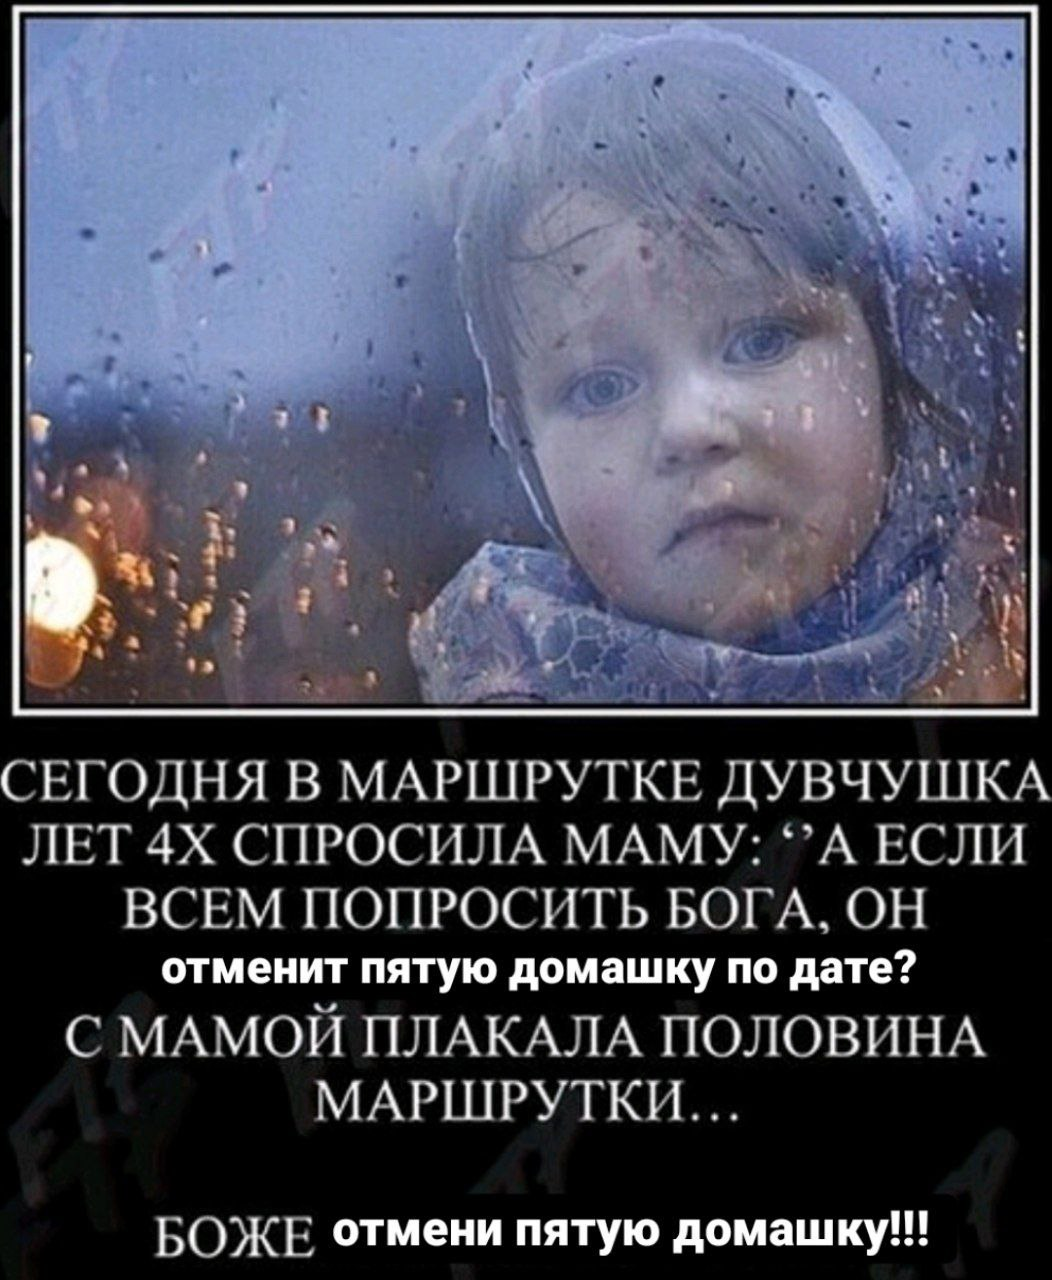

нет серьезно, на курсач не хватает времени из-за таких длинных и долгих домашек 🥺🥺🥺🥺🥺🥺🥺🥺🥺🥺🥺🥺